<a href="https://colab.research.google.com/github/dcownden/PerennialProblemsOfLifeWithABrain/blob/main/GridWorldSequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @markdown ---
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#widgets.__version__
#np.__version__

In [3]:
# user in control
stateDict = {'critterLocationXY': np.array([[]]),
             'critterLocationUnravel': np.array([]),
             'numMoves': 0,
             'numEats': 0,
             'numFoods': 30,
             'foodLocationsXY': np.array([[]]),
             'foodLocationsUnravel': np.array([]),
             'xSize': 10,
             'ySize': 10}

#randomly initialize food locations
stateDict['foodLocationsUnravel'] = np.sort(np.random.choice(stateDict['xSize']*stateDict['ySize'], stateDict['numFoods'], replace=False))
stateDict['foodLocationsXY'] = np.vstack(np.unravel_index(stateDict['foodLocationsUnravel'], (stateDict['xSize'], stateDict['ySize']))).T

# put critter roughly in the middle
stateDict['critterLocationXY'] = np.array([[np.floor(stateDict['xSize']/2), np.floor(stateDict['ySize']/2)]], dtype=int)
stateDict['critterLocationUravel'] = np.ravel_multi_index((stateDict['critterLocationXY'][:,0],stateDict['critterLocationXY'][:,1]), (stateDict['xSize'], stateDict['ySize'])) 

def updateCritterLocation(x, y, stateDict):
  stateDict['numMoves'] = stateDict['numMoves'] + 1
  stateDict['critterLocationXY'] = np.array([[x,y]])
  stateDict['critterLocationUravel'] = np.ravel_multi_index((stateDict['critterLocationXY'][:,0],stateDict['critterLocationXY'][:,1]), (stateDict['xSize'], stateDict['ySize']))
  return

def eating(stateDict):
  # is the critter on a food patch
  if stateDict['critterLocationUravel'][0] in set(stateDict['foodLocationsUnravel']):
    #print('eating!!!')
    #critter is on a food patch
    stateDict['numEats'] = stateDict['numEats'] + 1
    # add food where there isn't already food
    newFoodLocation = np.random.choice(list(set(np.arange(stateDict['xSize']*stateDict['ySize'])) - set(stateDict['foodLocationsUnravel'])))
    #print('new food location')
    #print(newFoodLocation)
    #old food gone
    #print('critter eating here')
    #print(stateDict['critterLocationUravel'][0])
    newFoodLocationsSet = set(stateDict['foodLocationsUnravel'])
    #print(np.array(np.sort(list(newFoodLocationsSet))))
    newFoodLocationsSet.remove(stateDict['critterLocationUravel'][0])
    #print(np.array(np.sort(list(newFoodLocationsSet))))

    # new food added
    newFoodLocationsSet.add(newFoodLocation)
    #print(np.array(np.sort(list(newFoodLocationsSet))))
    stateDict['foodLocationsUnravel'] = np.array(np.sort(list(newFoodLocationsSet)))
    stateDict['foodLocationsXY'] = np.vstack(np.unravel_index(stateDict['foodLocationsUnravel'], (stateDict['xSize'], stateDict['ySize']))).T
    #print(stateDict['foodLocationsUnravel'])
    stateDict['eatingString'] = ('You ate the food here, new food at ' + str(np.unravel_index(newFoodLocation, (stateDict['xSize'], stateDict['ySize']))))
  else:
    stateDict['eatingString'] = 'No food here'
  return

def updateState(x, y, StateDict):
  updateCritterLocation(x, y, StateDict)
  eating(stateDict)
  #print(stateDict['foodLocationsUnravel'])
  return

def plotFigFromScratch(stateDict):
  fig, ax = plt.subplots(figsize = (8,8))
  ax.set_xticks(np.arange(0, stateDict['xSize'], 1))
  ax.set_yticks(np.arange(0, stateDict['ySize'], 1))
  # Labels for major ticks
  ax.set_xticklabels(np.arange(0, stateDict['xSize'], 1))
  ax.set_yticklabels(np.arange(0, stateDict['ySize'], 1))

  # Minor ticks
  ax.set_xticks(np.arange(0.5, stateDict['xSize']-0.5, 1), minor=True)
  ax.set_yticks(np.arange(0.5, stateDict['ySize']-0.5, 1), minor=True)

  # Gridlines based on minor ticks
  ax.grid(which='minor', color='grey', linestyle='-', linewidth=2, alpha=0.5)

  # Remove minor ticks
  ax.tick_params(which='minor', bottom=False, left=False)

  ax.set_xlim(( -0.5, stateDict['xSize']-0.5))
  ax.set_ylim(( -0.5, stateDict['ySize']-0.5))

  #ax.axis("equal")
  critter = ax.scatter([], [], s=250.0, marker='h', color='blue', label='Critter')
  food = ax.scatter([], [], s=150, marker='o', color='red', label='Food')
  critter.set_offsets(stateDict['critterLocationXY'])
  food.set_offsets(stateDict['foodLocationsXY'])
  ax.legend()
  plt.show()
  return

def buttonOutputUpdate(whichButton, x, y, stateDict):
  with output:
    output.clear_output(wait=True)
    print(whichButton + " Button clicked." + "Criter is now at ({}, {}).".format(x,y))
    print(stateDict['eatingString'])
    print("Moves: {0} \tFood Eaten: {1} \tFood Per Move: {2}".format(stateDict['numMoves'], stateDict['numEats'], stateDict['numEats'] / stateDict['numMoves']))
    plotFigFromScratch(stateDict)
  return

upButton = widgets.Button(description="Up")
downButton = widgets.Button(description="Down")
leftButton = widgets.Button(description="Left")
rightButton = widgets.Button(description="Right")
output = widgets.Output()

def on_upButton_clicked(b):
  whichButton = 'Up'
  x = stateDict['critterLocationXY'][0][0]
  y = stateDict['critterLocationXY'][0][1]
  if y >= stateDict['ySize']-1:
    y = stateDict['ySize'] - 2
  elif y < stateDict['ySize']-1:
    y = y+1
  updateState(x, y, stateDict)
  buttonOutputUpdate(whichButton, x, y, stateDict)

def on_downButton_clicked(b):
  whichButton = 'Down'
  x = stateDict['critterLocationXY'][0][0]
  y = stateDict['critterLocationXY'][0][1]
  if y > 0 :
    y = y-1
  elif y <= 0:
    y = 1
  updateState(x, y, stateDict)
  buttonOutputUpdate(whichButton, x, y, stateDict)

def on_leftButton_clicked(b):
  whichButton = 'Left'
  x = stateDict['critterLocationXY'][0][0]
  y = stateDict['critterLocationXY'][0][1]
  if x > 0 :
    x = x-1
  elif x <= 0:
    x = 1
  updateState(x, y, stateDict)
  buttonOutputUpdate(whichButton, x, y, stateDict)
    
def on_rightButton_clicked(b):
  whichButton = 'Right'
  x = stateDict['critterLocationXY'][0][0]
  y = stateDict['critterLocationXY'][0][1]
  if x >= stateDict['xSize']-1:
    x = stateDict['xSize'] - 2
  elif x < stateDict['xSize']-1:
    x = x+1
  updateState(x, y, stateDict)
  buttonOutputUpdate(whichButton, x, y, stateDict)

upButton.on_click(on_upButton_clicked)
downButton.on_click(on_downButton_clicked)
leftButton.on_click(on_leftButton_clicked)
rightButton.on_click(on_rightButton_clicked)

with output:
  output.clear_output(wait=True)
  print('Press a button')  
  plotFigFromScratch(stateDict)
display(upButton, downButton, leftButton, rightButton, output)

Button(description='Up', style=ButtonStyle())

Button(description='Down', style=ButtonStyle())

Button(description='Left', style=ButtonStyle())

Button(description='Right', style=ButtonStyle())

Output()

In [ ]:
# janky random button pressing
stateDict = {'critterLocation': {'x': 5.0, 'y': 5.0},
              'numMoves': 0,
              'numEats': 0,
              'numFoods': 3,
              'foodLocation': np.array([[]]),
              'xSize': 10,
              'ySize': 10}

def sampleComb(dims, nsamp):
    idx = np.random.choice(np.prod(dims), nsamp, replace=False)
    return np.vstack(np.unravel_index(idx, dims)).T

stateDict['foodLocations'] = sampleComb([stateDict['xSize'], stateDict['ySize']], stateDict['numFoods'])

def plot_fig_from_scratch(stateDict):
  critterX = stateDict['critterLocation']['x']
  critterY = stateDict['critterLocation']['y'] 
  fig, ax = plt.subplots()
  ax.set_xticks(np.arange(0, stateDict['xSize']+1, 1))
  ax.set_yticks(np.arange(0, stateDict['ySize']+1, 1))
  # Labels for major ticks
  ax.set_xticklabels(np.arange(0, stateDict['xSize']+1, 1))
  ax.set_yticklabels(np.arange(0, stateDict['ySize']+1, 1))

  # Minor ticks
  ax.set_xticks(np.arange(1.5, stateDict['xSize']+0.5, 1), minor=True)
  ax.set_yticks(np.arange(1.5, stateDict['ySize']+0.5, 1), minor=True)

  # Gridlines based on minor ticks
  ax.grid(which='minor', color='grey', linestyle='-', linewidth=2, alpha=0.5)

  # Remove minor ticks
  ax.tick_params(which='minor', bottom=False, left=False)

  ax.set_xlim(( 0.5, stateDict['xSize']+0.5))
  ax.set_ylim(( 0.5, stateDict['ySize']+0.5))

  #ax.axis("equal")
  critter = ax.scatter([], [], s=250.0, marker='h',)
  critter.set_offsets([[critterX, critterY]])
  plt.show()

upButton = widgets.Button(description="Up")
downButton = widgets.Button(description="Down")
leftButton = widgets.Button(description="Left")
rightButton = widgets.Button(description="Right")
output = widgets.Output()

def on_upButton_clicked(b):
  x = stateDict['critterLocation']['x']
  y = stateDict['critterLocation']['y']
  if y > 9:
    y = 9.0
  elif y <= 9:
    y = y+1
  stateDict['critterLocation']['y'] = y
  with output:
    output.clear_output(wait=True)
    plot_fig_from_scratch(stateDict)
    print("Up Button clicked.")
    print("New coordinate value is ({},{}).".format(x,y))

def on_downButton_clicked(b):
  x = stateDict['critterLocation']['x']
  y = stateDict['critterLocation']['y']
  if y > 1 :
    y = y-1
  elif y <= 1:
    y = 2.0
  stateDict['critterLocation']['y'] = y
  with output:
    output.clear_output(wait=True)
    plot_fig_from_scratch(stateDict)
    print("Down Button clicked.")
    print("New coordinate value is ({},{}).".format(x,y))

def on_leftButton_clicked(b):
  x = stateDict['critterLocation']['x']
  y = stateDict['critterLocation']['y']
  if x > 1 :
    x = x-1
  elif x <= 1:
    x = 2.0
  stateDict['critterLocation']['x'] = x
  with output:
    output.clear_output(wait=True)
    plot_fig_from_scratch(stateDict)
    print("Left Button clicked.")
    print("New coordinate value is ({},{}).".format(x,y))
    

def on_rightButton_clicked(b):
  x = stateDict['critterLocation']['x']
  y = stateDict['critterLocation']['y']
  if x < 10.0 :
    x = x+1
  elif x >= 10.0:
    x = 9.0
  stateDict['critterLocation']['x'] = x
  with output:
    output.clear_output(wait=True)
    plot_fig_from_scratch(stateDict)
    print("Right Button clicked.")
    print("New coordinate value is ({},{}).".format(x,y))

upButton.on_click(on_upButton_clicked)
downButton.on_click(on_downButton_clicked)
leftButton.on_click(on_leftButton_clicked)
rightButton.on_click(on_rightButton_clicked)


display(upButton, downButton, leftButton, rightButton, output)

# 20 random button presses one every ~3 seconds
for ii in range(20):
  move = np.random.randint(0,4)
  if move == 0:
    upButton.click()
  elif move == 1:
    downButton.click()
  elif move == 2:
    leftButton.click()
  elif move == 3:
    rightButton.click()
  else:
    print('should not happen')
  time.sleep(3)

#need to figure out how to overlay/interleave user button mashing and timed random button mashing

Button(description='Up', style=ButtonStyle())

Button(description='Down', style=ButtonStyle())

Button(description='Left', style=ButtonStyle())

Button(description='Right', style=ButtonStyle())

Output()

Useful scavenging from github and SO

In [ ]:
out = widgets.Output(layout=widgets.Layout(height='300px'))

x = np.linspace(0,1,100)

def update_plot(w):
    with out:
        # Without clear_output(), figures get appended below each other inside
        # the output widget
        # Ah ha! Got it! I need wait=True!
        out.clear_output(wait=True)
        plt.plot(x, x**p_widget.value)  
        plt.show()

p_widget = widgets.FloatSlider(min=0, max=2, step=0.1, value = 1)
update_plot([])
p_widget.observe(update_plot)
display(p_widget, out)

FloatSlider(value=1.0, max=2.0)

Output(layout=Layout(height='300px'))

In [ ]:
import ipywidgets as widgets

x = 0
y = {"x": 0}
b = widgets.Button(description="Do it")

def doit(obj):
    print(x, y)
    # x += 1 # uncommenting makes the above print fail
    y["x"] += 1 # this is ok

b.on_click(doit)
display(b)

Button(description='Do it', style=ButtonStyle())

In [ ]:
# how to get figures to work in this context nicely???
a = widgets.FloatSlider(description='a', min=0, max=10)
b = widgets.FloatSlider(description='b', min=0, max=10)
c = widgets.FloatSlider(description='c', min=0, max=10)

def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

In [ ]:
from matplotlib import animation, rc, patches
from IPython.display import HTML

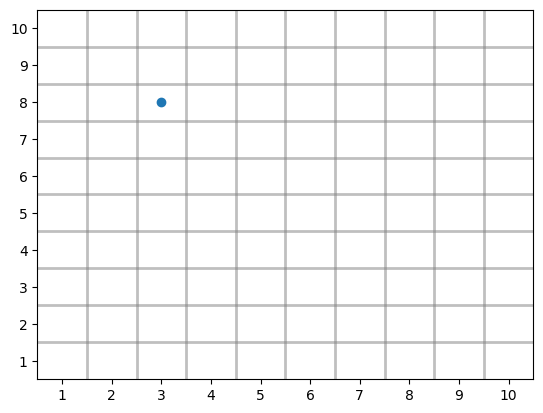

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, 11, 1))
ax.set_yticklabels(np.arange(0, 11, 1))

# Minor ticks
ax.set_xticks(np.arange(1.5, 10.5, 1), minor=True)
ax.set_yticks(np.arange(1.5, 10.5, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='grey', linestyle='-', linewidth=2, alpha=0.5)

# Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)

ax.set_xlim(( 0.5, 10.5))
ax.set_ylim(( 0.5, 10.5))

#ax.axis("equal")
scatter = ax.scatter([], [])
#critterCircle = plt.Circle((5,5), 0.4)
#dot = ax.add_patch(critterCircle)
#scatter.set_offsets([[5, 5]])

scatter.set_offsets([[3, 11-3]])
#fig.canvas.draw()
#fig.canvas.flush_events()

In [ ]:
def init():
    scatter.set_offsets([[5, 5]])
    return scatter,

In [ ]:
def animate_dot(i):
    print(i)
    x = i
    y = 11-i
    scatter.set_offsets([[x, y]])
    return scatter, 

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate_dot, init_func=init,
                               frames=(np.arange(10)+1), interval=500, blit=True)

In [ ]:
HTML(anim.to_html5_video())

1
2
3
4
5
6
7
8
9
10


In [ ]:
rc('animation', html='html5')

In [ ]:
anim

These movies are really pretty compared drawing everything from scratch, each time, need to figure out some way to combine the two eventually, but will keep prototyping in janky mode for now.